<a href="https://colab.research.google.com/github/dee-ah-nuh/Stroke/blob/main/Shoe_and_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import seaborn as sns

In [ ]:
stroke = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Bootcamp/Project 2 /healthcare-dataset-stroke-data.csv')
stroke.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [ ]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

1. Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)


2. The Data includes statistics of patients who have had a stroke, stroke-like symptoms, and no stroke to determine weather we can predcit someone can have a stroke depending on the other features like bmi, height, weight, age, gender, diseases, etc...

3. Target = Stroke (or not)

4. Classification problem =  whether player has a stroke or not

5&6. There are around 12 features and around 8K rows of data

7. I belive that this dataset is the perfect balance between complex and simplistic allowing for easy predictions and modeling. 

In [ ]:
#getting a value of all NaN or Missing
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Getting all the duplicated values
stroke.duplicated().sum()

0

In [ ]:
#Checking the column 'bmi' because it was the only one contaning missing values
stroke['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

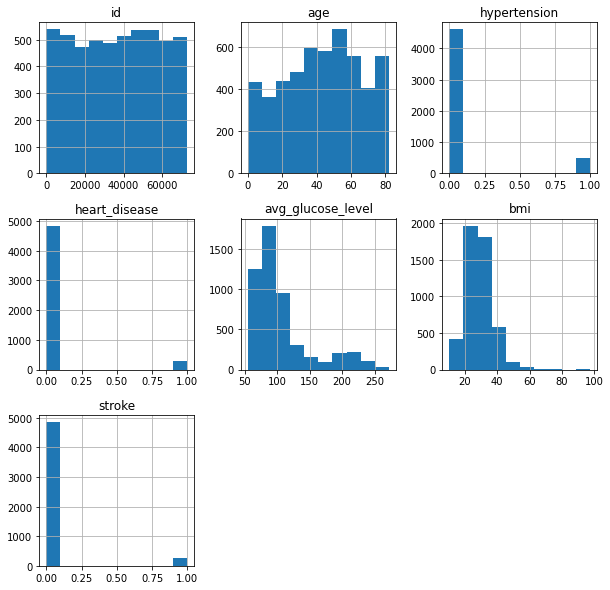

In [ ]:
Stroke_graph = stroke.hist(figsize = (10,10))

Average Glucose level is one of the few abnormla distributions - this one is skewed to the right. BMI is also a histogram that poses a slight skew to the right. Stroke, Heart Disease and Hypertension are all bimodal since the columns are 

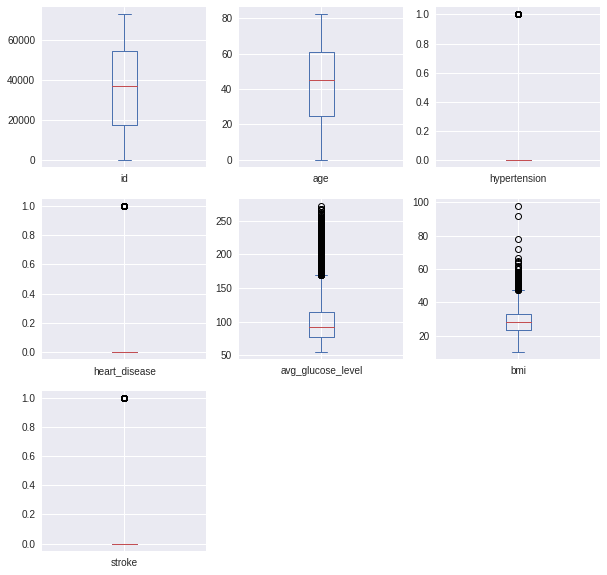

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
stroke.plot(kind='box',subplots=True ,layout=(3,3),sharex=False , sharey=False , figsize =(10,10))
plt.show()

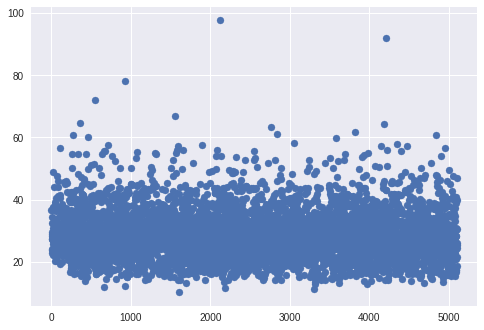

In [ ]:
plt.scatter(stroke.index, stroke['bmi'])
plt.show()

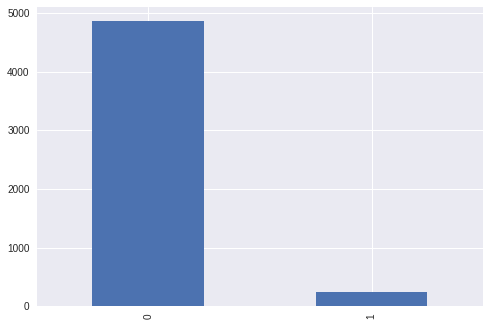

In [ ]:
stroke['stroke'].value_counts().plot(kind='bar')

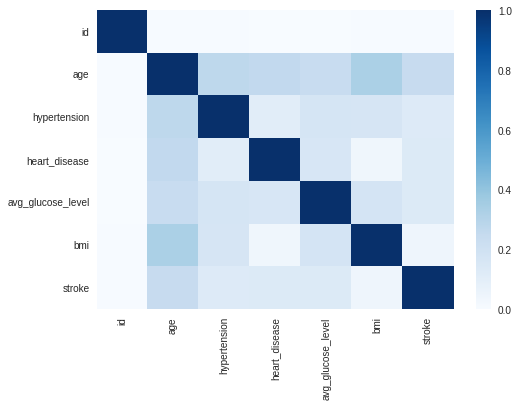

In [ ]:
#Creating a correlation map to show moderate to strong correlations between target features and other columns
corr = stroke.corr()
sns.heatmap(corr, cmap = 'Blues')

In [ ]:
#Creating a filter to select all columns that are non-numerical so we can correct for inconsistencies
nominal_selector = stroke.select_dtypes(include='object')
for col in nominal_selector.columns:
  print(col)
  print(nominal_selector[col].value_counts(), '\n');

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64 

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 



Validation Split - Classification Problem

In [ ]:
X=stroke.drop(columns='stroke')
y = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
nominal_selector = make_column_selector(dtype_include='object')
numeric_selector = make_column_selector(dtype_include='number')

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='Missing')

In [ ]:
nominal_pipeline = make_pipeline(missing_imputer, ohe)
numeric_pipeline = make_pipeline(mean_imputer, scaler)

In [ ]:
nominal_tup = (nominal_pipeline, (['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']))
numeric_tup = (numeric_pipeline, numeric_selector)

In [ ]:
preprocessor = make_column_transformer(numeric_tup, nominal_tup, remainder='passthrough')

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa9a590e450>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=Fal